In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# [Histograms - 1 : Find, Plot, Analyze !!!](https://docs.opencv.org/3.4/d1/db7/tutorial_py_histogram_begins.html)

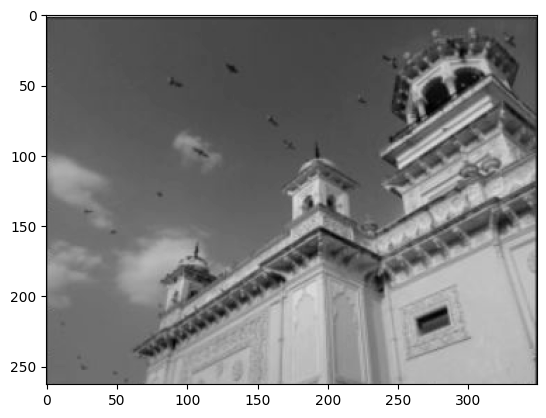

In [56]:
plt.imshow(img, cmap="gray")

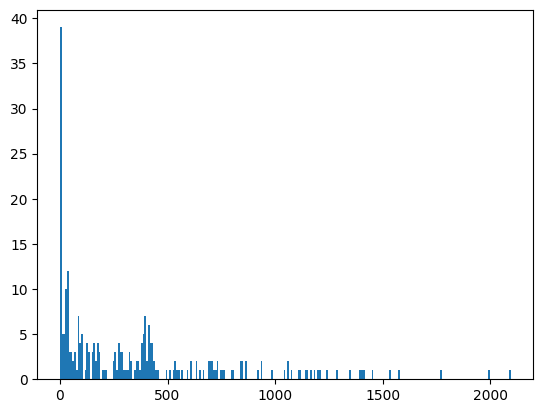

In [59]:
img = cv.imread('../img/home.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
hist = cv.calcHist([img],[0],None,[256],[0,256])
plt.hist(hist, bins=256)
plt.show()

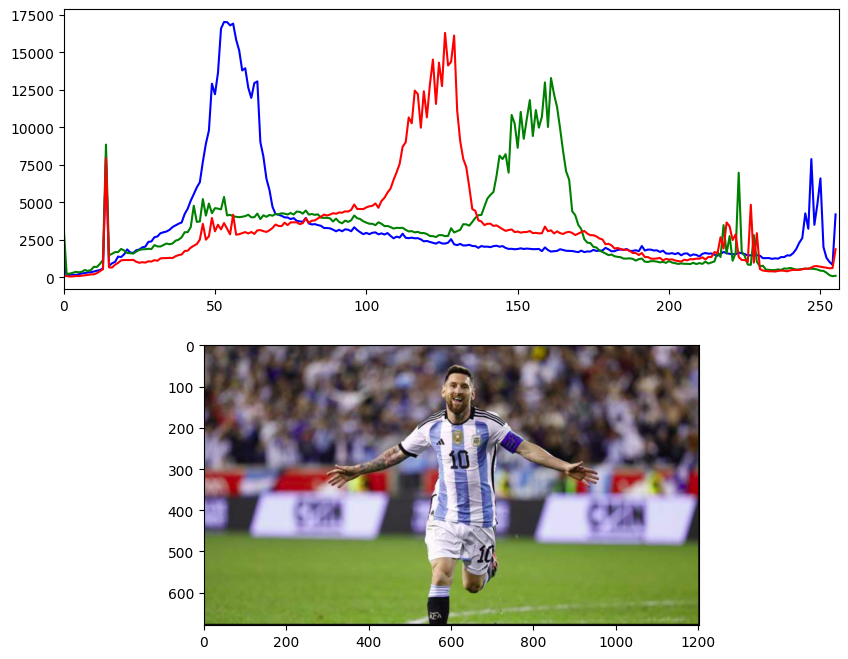

In [23]:
img = cv.imread('../img/messi.png')
color = ('b','g','r')
fig, ax = plt.subplots(2, 1, figsize=(10,8))
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    ax[0].plot(histr,color = col)
    ax[0].set_xlim([0,256])

ax[1].imshow(img[..., ::-1])
plt.show()

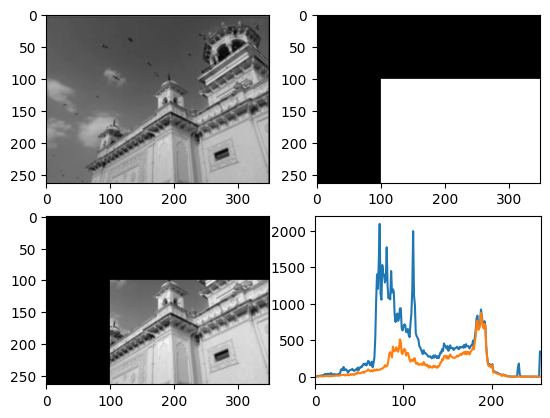

In [12]:
img = cv.imread('../img/home.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

# [Histograms - 2: Histogram Equalization](https://docs.opencv.org/3.4/d5/daf/tutorial_py_histogram_equalization.html)

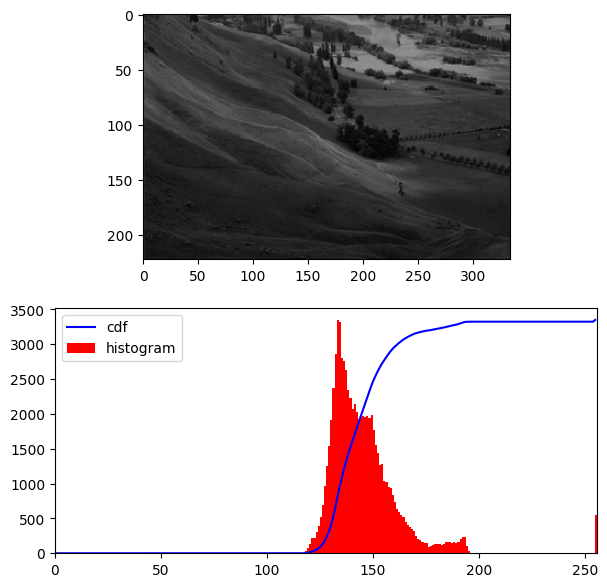

In [27]:
img = cv.imread('../img/hills.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

fig, ax = plt.subplots(2, 1, figsize=(7, 7))
ax[0].imshow(img, cmap="gray")
ax[1].plot(cdf_normalized, color = 'b')
ax[1].hist(img.flatten(),256,[0,256], color = 'r')
ax[1].set_xlim([0,256])
ax[1].legend(('cdf','histogram'), loc = 'upper left')
plt.show()

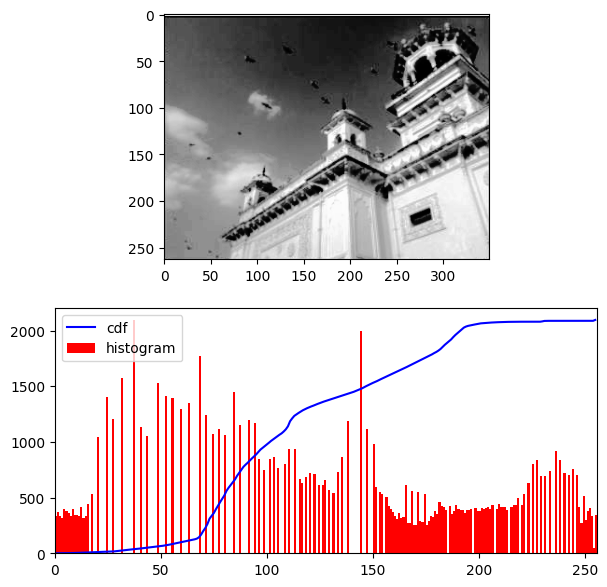

In [60]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]

fig, ax = plt.subplots(2, 1, figsize=(7, 7))
ax[0].imshow(img2, cmap="gray")
ax[1].plot(cdf_normalized, color = 'b')
ax[1].hist(img2.flatten(),256,[0,256], color = 'r')
ax[1].set_xlim([0,256])
ax[1].legend(('cdf','histogram'), loc = 'upper left')
plt.show()

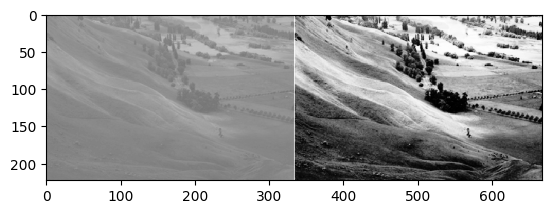

In [37]:
img = cv.imread('../img/hills.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side

plt.imshow(res, cmap="gray")
plt.show()

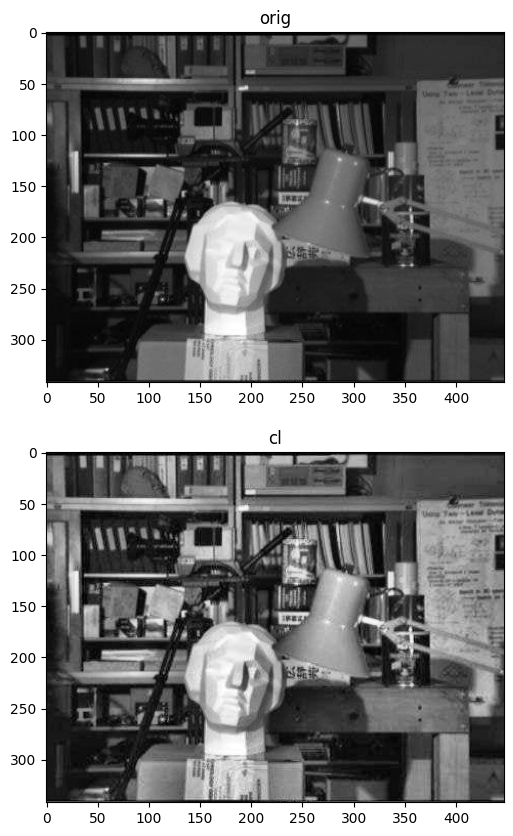

In [43]:
img = cv.imread('../img/bust.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("orig")
ax[1].imshow(cl1, cmap="gray")
ax[1].set_title("cl")
plt.show()

# [Histograms - 3 : 2D Histograms](https://docs.opencv.org/3.4/dd/d0d/tutorial_py_2d_histogram.html)

In [63]:
img = cv.imread('../img/home.png')
assert img is not None, "file could not be read, check with os.path.exists()"
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
hist = cv.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
cv.imshow(hist)
# plt.show()

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


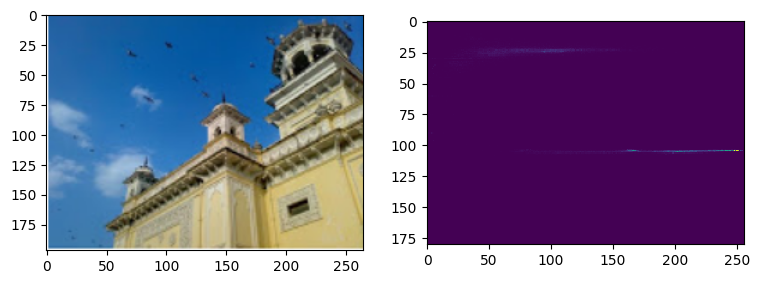

In [52]:
img = cv.imread('../img/castle.png')
assert img is not None, "file could not be read, check with os.path.exists()"
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
hist = cv.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )

fig, ax = plt.subplots(1, 2, figsize=(9, 11))
ax[0].imshow(img[..., ::-1])
ax[1].imshow(hist,interpolation = 'nearest')
plt.show()